## Proyecto 2:  Agrupación
### Mall Customers
Pablo López Landeros 178863

Juan Pablo Álvarez Gamboa 165815   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#%matplotlib inline
np.random.seed(165815)

In [2]:
customers = pd.read_csv('https://github.com/jpag2409/Mall_Customers/raw/master/Mall_Customers.csv')
customers.shape

(200, 5)

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Tipo de datos

In [4]:
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Limpieza de nombres de columnas

In [5]:
# Limpiar los nombres de columnas
def _cleaner(col):
    """
    Clean a specific column
    
    :param: column name to clean
    :return: column cleaned, without blank spaces, point and accents
    """
    return col.lower()\
    .replace(' ','_').replace('.','')\
    .replace('/','_').replace(';','')\
    .replace('á','a').replace('é','e')\
    .replace('í','i').replace('ó','o')\
    .replace('ú','u')

In [6]:
def clean_column_names(df):
    """
    Clean column names of a dataframe: to lower, without accents, without spaces, without punctuation signs
    
    :param: dataframe to clean column names
    :return: dataframe with clean column names
    """
    cols = {col_name: _cleaner(col_name) for col_name in df.columns.values}
    return df.rename(columns=cols, inplace=True)

In [7]:
clean_column_names(customers)

In [8]:
customers.columns

Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

### Tipos de variables

In [9]:
# variables numéricas
number_variables = customers.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(4,
 array(['customerid', 'age', 'annual_income_(k$)',
        'spending_score_(1-100)'], dtype=object))

In [10]:
# strings 
string_variables = customers.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(1, array(['gender'], dtype=object))

In [11]:
# verify if we check for all the types
if (sum([len(number_variables), len(string_variables)]) == customers.shape[1]): 
    print('ok')
else:
    print('columns missing')

ok


### Data profiling

In [12]:
def numeric_profiling(df, col, profiling_dict):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'prop_missings': sum(df[col].isna())/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    profiling_dict.update({col: profiling})
    
    return profiling_dict

In [13]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head()
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'

In [14]:
profiling_dict = {}

numeric_profiling_output = [numeric_profiling(customers, elem, profiling_dict)\
                            for elem in number_variables]

In [15]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output[0]).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,customerid,age,annual_income_(k$),spending_score_(1-100)
0,max,200.000000,70.000000,137.000000,99.000000
1,min,1.000000,18.000000,15.000000,1.000000
2,mean,100.500000,38.850000,60.560000,50.200000
3,stdv,57.879185,13.969007,26.264721,25.823522
4,25%,50.750000,28.750000,41.500000,34.750000
5,median,100.500000,36.000000,61.500000,50.000000
6,75%,150.250000,49.000000,78.000000,73.000000
7,kurtosis,-1.200000,-0.671573,-0.098487,-0.826629
8,skewness,0.000000,0.485569,0.321843,-0.047220
9,uniques,200.000000,51.000000,64.000000,84.000000


Vemos que nuestro dataset cuenta con 200 clientes distintos. Su rango de ingreso es muy variado ya que el mínimo está en $15,000 anuales y el máximo en $137,000. Tal vez el centro comercial sea de tiendas como joyerías ya que vemos que el cliente más joven tiene 18 años. Es decir, no es un centro comercial a donde vayan niños. Más aun, el valor de edad que más se repite es 32 años y el segundo 35. Luego entonces podemos asumir que la plaza no tiene tiendas del giro de Gameplanet o Ferrioni. Vemos que es un dataset completo al 100% ya que no falta ningún dato. Tiene sentido ya que es un dataset pequeño. Sobre la variable spending score no podemos saber mucho, su media es igual a su mediana, su máximo es 99 y su mínimo es 1 entonces poco se puede saber a priori sobre los hábitos de los clientes.

In [16]:
customers.describe()

,customerid,age,annual_income_(k$),spending_score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
#import pandas_profiling

In [18]:
#profile = customers.profile_report()

### Preguntas EDA
1. ¿Cuántos clientes diferentes hay en el dataset?



In [19]:
c=customers['customerid'].nunique()
print("Este dataset cuenta con "+str(c)+" clientes distintos")

Este dataset cuenta con 200 clientes distintos


2. ¿Qué edad tiene el 75% de los clientes?   
Obtuvimos que el 75% (Q3) de las observaciones tienen entre 18 y 49 años. Esto se puede ver en el "numeric profiling" (el valor mínimo de edad es 18 y el Q3 es de 49) u obteniendo manualmente el cuartil .75 y ayudarnos con un diagrama de caja. 

El 75% de los clientes tienen 49.0 años


Text(0.5, 1.0, 'Diagrama de caja para la variable age')

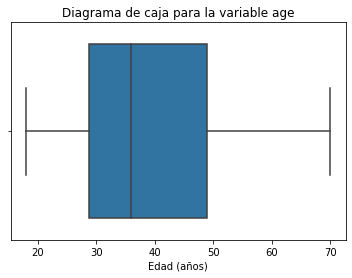

In [20]:
q=customers['age'].quantile(0.75)
print("El 75% de los clientes tienen "+str(q)+" años")
ax = sns.boxplot(customers['age'])
ax.set(xlabel="Edad (años)")
plt.title('Diagrama de caja para la variable age')

Aquí podemos ver un poco más claro que nuestro centro comercial es concurrido por adultos jóvenes o de mediana edad. El 75% de los clientes tienen menos de 49 años. Además, solo el 25% tiene menos de 28 años. Por lo tanto, la mayoría de nuestros datos tienen son adultos jóvenes de entre 28 y 49 años.

3. Genera un boxplot con el `Anual Income`  por cuartil de edad.

In [21]:
#Voy a crear una función que nos agregue una columna en donde se indique el numero de quartil de edad al que pertenece
def agregacuartiles(df):
    q1=df['age'].quantile(0.25)
    q2=df['age'].quantile(0.50)
    q3=df['age'].quantile(0.75)
    df['quartil'] = df['age'].apply(lambda x: 1 if x <= q1 else 2 if x>q1 and x<=q2 else 3 if x>q2 and x<=q3 else 4)
    
    

Counter({2: 54, 3: 51, 1: 50, 4: 45})


Text(0.5, 1.0, 'Diagrama de caja para la variable `annual_income_(k$)`  por cuartil de edad')

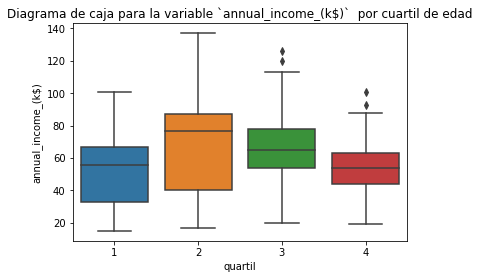

In [22]:
#Le aplico la funcion al dataframe de clientes y luego grafico agrupando por valores en la columna "quartil"
agregacuartiles(customers)
print(Counter(list(customers["quartil"])))
sns.boxplot(x="quartil",y="annual_income_(k$)", data=customers)
plt.title('Diagrama de caja para la variable `annual_income_(k$)`  por cuartil de edad')

El resultado creo que no es sorprendente. El primer cuartil registra un ingreso bajo porque aún no tienen mucha experiencia y ganan poco. Sin embargo, en el 2o y 3er cuartil que son entre los 28 y 49 años de edad, vemos que el ingreso sube un poco. Podemos suponer que esto es porque en esta edad es donde más activo se está enconómicamente hablando. Por útlimo, en el cuartil que va aproximadamente entre los 50 y 70 años, vemos que el ingreso anual disminuye un poco. De nuevo, esto tiene sentido ya que en los adultos de la tercera edad no son tan económicamente activos. 

4. Genera un histograma con el `Spending Score`

Text(0, 0.5, 'Frecuencia')

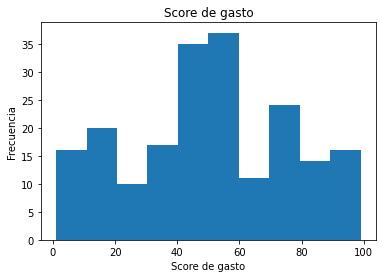

In [23]:
plt.hist(customers['spending_score_(1-100)'],bins=10)
plt.title('Score de gasto')
plt.locator_params(axis='y', integer=True)
plt.xlabel("Score de gasto")
plt.ylabel("Frecuencia")

Primeramente notemos que esta variable podría ser aproximada por una sitribución normal. Vemos que los valores que se presentan con más frecuencia están entre 40 y 60. Esto nos da lugar a pensar que la mayoría de los clientes son medidos en su gasto. No son desenfrenados pero pueden ser propensos a gastar una buena cantidad. 

5. Genera una gráfica que incluya el histograma de `Spending Score` por `Gender`

In [24]:
male = customers[customers.gender == 'Male']
male.shape

(88, 6)

In [25]:
female = customers[customers.gender == 'Female']
female.shape

(112, 6)

Text(0, 0.5, 'Frecuencia')

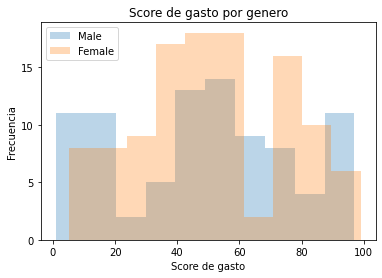

In [26]:
plt.hist(male['spending_score_(1-100)'],bins=10, alpha=0.3,label="Male")
plt.hist(female['spending_score_(1-100)'],bins=10, alpha=0.3,label="Female")
plt.legend(loc="best")
plt.title('Score de gasto por genero')
plt.locator_params(axis='y', integer=True)
plt.xlabel("Score de gasto")
plt.ylabel("Frecuencia")

De la gráfica anterior podemos ver que los hombres parecen ser menos propensos a gastar que las mujeres. Esto se ve porque hay un numero considerable de hobres qe presentan valores menores a 20. Sin embargo, para las mujeres el pico de frecuencia en spending score está entre 60 y 40. Además tambien en mujeres podemos ver frecuencia alta para el score entre 70 y 80. Finalmente vemos que aunque las frecuencias mayores tanto para hombres como para mujeres están entre 40 y 60, el pico de las mujeres es mayor. 

6. Genera un gráfica que incluya el histograma de `Annual Income` por `Gender`

Text(0, 0.5, 'Frecuencia')

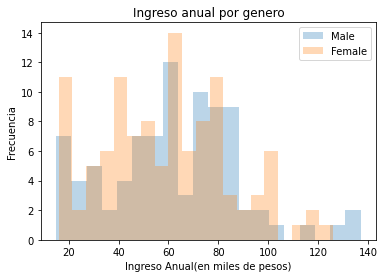

In [27]:
plt.hist(male['annual_income_(k$)'],bins=20, alpha=0.3,label="Male")
plt.hist(female['annual_income_(k$)'],bins=20, alpha=0.3,label="Female")
plt.legend(loc="best")
plt.title('Ingreso anual por genero')
plt.locator_params(axis='y', integer=True)
plt.xlabel("Ingreso Anual(en miles de pesos)")
plt.ylabel("Frecuencia")

Aquí podemos ver que casi en todos los rangos, hay más mujeres que ganan esa cantidad que hombres. Desafortunadamente, cabe destacar que ninguna mujer gana por arriba de los $130 k mensuales. Esto puede ser reflejo de la desigualdad de género que vivimos en el país. 

In [32]:
# Transformación de variables 
customers.gender.mask(customers.gender == 'Female','1', inplace=True)
customers.gender.mask(customers.gender == 'Male', '0', inplace=True)
customers.head()
# Nota: No tiene sentido escalar gender

,customerid,gender,age,annual_income_(k$),spending_score_(1-100),quartil
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,2


### Escalamiento de datos

In [33]:
from sklearn.preprocessing import scale

* Nota: Decidimos excluir la variable género para realizar los clusters. Consultamos diversas fuentes (Cross Validated, Data Science stack exchange, libros) y todas indicaban que utilizar variables categóricas dentro de un algoritmo k-means es muy poco recomendable. Puede alterar los resultados negativamente. La justificación matemática que leímos fue que el algoritmo k means basa su funcionamiento en la distancia euclidiana. Para variables categóricas la métrica euclidiana en Rn no tiene mucho significado para valores discretos que se repiten. Más aún, para nuestro dataset, la norma euclidiana para una categoría binaria sería constante. 

In [34]:
customers_scaled = scale(customers[['age','annual_income_(k$)','spending_score_(1-100)']], with_mean=True, with_std=True)
customers_scaled[:10,]
#Nota: Nos quedamos con las variables age, annual income y spending score

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

### Grupos de 4

In [84]:
from sklearn.cluster import KMeans

np.random.seed(165815)

kmeans = KMeans(n_clusters=4, max_iter=10, n_jobs=-1)
k_means_4 = kmeans.fit(customers_scaled)
k_means_4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [85]:
k_means_4.cluster_centers_

array([[-0.96249203, -0.78476346,  0.39202966],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 1.08616125, -0.49056525, -0.39717443],
       [ 0.03720536,  0.99011499, -1.18875705]])

In [86]:
labels = k_means_4.labels_
labels[:70]

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0])

In [87]:
data = pd.DataFrame({'age': customers_scaled[:,0], 
                     'annual_income_(k$)': customers_scaled[:,1],
                     'spending_score_(1-100)': customers_scaled[:,2],
                     'cluster': labels})

data.head()

,age,annual_income_(k$),spending_score_(1-100),cluster
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [88]:
data.groupby(['cluster'])['annual_income_(k$)']\
.count()\
.reset_index()\
.rename(columns={"annual_income_(k$)": "count"})

,cluster,count
0,0,57
1,1,40
2,2,65
3,3,38


In [89]:
centroids = k_means_4.cluster_centers_
centroids

array([[-0.96249203, -0.78476346,  0.39202966],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 1.08616125, -0.49056525, -0.39717443],
       [ 0.03720536,  0.99011499, -1.18875705]])

In [90]:
data_w_centroids = pd.DataFrame({'age': centroids[:,0], 
                                 'annual_income_(k$)': centroids[:,1],
                                 'spending_score_(1-100)': centroids[:,2],
                                 'cluster': [-1,-1,-1,-1]})

data_w_centroids

,age,annual_income_(k$),spending_score_(1-100),cluster
0,-0.962492,-0.784763,0.392030,-1
1,-0.428806,0.974847,1.216085,-1
2,1.086161,-0.490565,-0.397174,-1
3,0.037205,0.990115,-1.188757,-1


In [176]:
all_data = data_w_centroids.append(data,sort=False)
pd.set_option('display.max_rows', 15000)
all_data.head()

,age,annual_income_(k$),spending_score_(1-100),cluster,group
0,-0.962492,-0.784763,0.392030,-1,NaN
1,-0.428806,0.974847,1.216085,-1,NaN
2,1.086161,-0.490565,-0.397174,-1,NaN
3,0.037205,0.990115,-1.188757,-1,NaN
0,-1.424569,-1.738999,-0.434801,0,0.0


In [92]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs='age', ys='annual_income_(k$)', zs='spending_score_(1-100)')

### Método del codo (Elbow method)

In [98]:
kmeans_3 = KMeans(n_clusters=3, max_iter=10, n_jobs=-1)
k_means_3 = kmeans_3.fit(customers_scaled)
k_means_3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
kmeans_5 = KMeans(n_clusters=5, max_iter=10, n_jobs=-1)
k_means_5 = kmeans_5.fit(customers_scaled)
k_means_5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
kmeans_6 = KMeans(n_clusters=6, max_iter=10, n_jobs=-1)
k_means_6 = kmeans_6.fit(customers_scaled)
k_means_6

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
kmeans_7 = KMeans(n_clusters=7, max_iter=10, n_jobs=-1)
k_means_7 = kmeans_7.fit(customers_scaled)
k_means_7

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [102]:
kmeans_8 = KMeans(n_clusters=8, max_iter=10, n_jobs=-1)
k_means_8 = kmeans_8.fit(customers_scaled)
k_means_8

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
kmeans_9 = KMeans(n_clusters=9, max_iter=10, n_jobs=-1)
k_means_9 = kmeans_9.fit(customers_scaled)
k_means_9

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
sses = pd.DataFrame({'k': [3,4,5,6,7,8,9],
                     'sse': [round(k_means_3.inertia_,2),
                             round(k_means_4.inertia_,2),
                             round(k_means_5.inertia_,2),
                             round(k_means_6.inertia_,2), 
                             round(k_means_7.inertia_,2),
                             round(k_means_8.inertia_,2),
                             round(k_means_9.inertia_,2)]})

sses

,k,sse
0,3,295.21
1,4,205.23
2,5,168.25
3,6,133.89
4,7,117.09
5,8,104.10
6,9,93.41


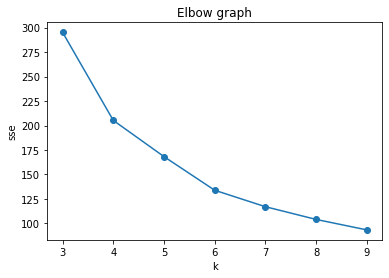

In [114]:
plt.clf()
plt.plot(sses.k, sses.sse)
plt.scatter(sses.k, sses.sse)
plt.xticks([3,4,5,6,7,8,9])
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow graph")
plt.show()

7. ¿Cuál es la $k$ adecuada estadísticamente?   
Sabemos que al aumentar `k`, aumentamos el número de centroides y por ende, el número de grupos. Por lo tanto, habrá menos elementos en cada grupo conforme aumentemos `k`. Sin embargo, no podemos llegar a que cada observación es un grupo porque caemos en overfitting y la varianza de cada grupo será 0.

Siguiendo el método del codo, creemos que la `k` donde más información ganamos es `k=4` ya que el codo de la gráfica en efecto está en 4. Además viendo la tabla de ganancia de información (disminución de la varianza) vemos que en `k=4` es dónde más información ganamos. Sin embargo, habría que consultar con los expertos de negocio ya que `k=6` podría ser una k factible ya que solo 4 grupos de personas para  un centro comercial más grande puede ser bajo. 

8. ¿Cuáles son los centroides de cada grupo?

Como seleccionaremos `k=4`, entonces extraeremos esos centroides. 


In [175]:
centroids  = k_means_4.cluster_centers_
centroids_df=pd.DataFrame(centroids, columns=['age','anual_income','spending_score'])
centroids_df.insert(loc=0, column='Cluster', value=[0,1,2,3])
centroids_df

,Cluster,age,anual_income,spending_score
0,0,-0.962492,-0.784763,0.392030
1,1,-0.428806,0.974847,1.216085
2,2,1.086161,-0.490565,-0.397174
3,3,0.037205,0.990115,-1.188757


Visualización de Grupos con las 2 variables seleccionadas incluyendo centroides:

Text(0.5, 1.0, 'Clusters generados para k=4')

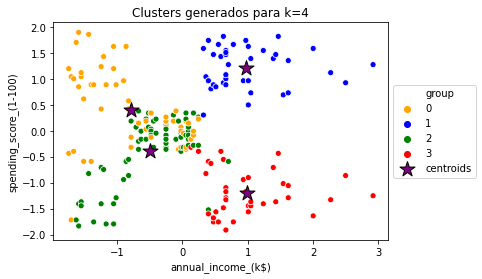

In [148]:
data["group"]=labels
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue="group", data=data,palette=["orange", "blue","green", "red"])
plt.scatter(
    k_means_4.cluster_centers_[:, 1], k_means_4.cluster_centers_[:, 2],
    s=250, marker='*',
    c='purple', edgecolor='black',
    label='centroids'
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Clusters generados para k=4")

Ahora hagamos una visualización tomando en cuenta la variable género

In [163]:
df=data.drop(['group'], axis=1)
df.insert(loc=0, column='CustomerId', value=list(range(1, 201)))
df["sex"]=customers["gender"]
df.head()

,CustomerId,age,annual_income_(k$),spending_score_(1-100),cluster,sex
0,1,-1.424569,-1.738999,-0.434801,0,0
1,2,-1.281035,-1.738999,1.195704,0,0
2,3,-1.352802,-1.700830,-1.715913,0,1
3,4,-1.137502,-1.700830,1.040418,0,1
4,5,-0.563369,-1.662660,-0.395980,0,1


Text(0.5, 1.0, 'Clusters generados para k=4 (tomando en cuenta el género)')

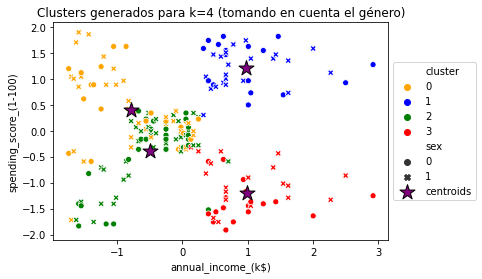

In [178]:
sns.scatterplot(x='annual_income_(k$)', y='spending_score_(1-100)', hue="cluster",style="sex",data=df,palette=["orange", "blue","green", "red"])
plt.scatter(
    k_means_4.cluster_centers_[:, 1], k_means_4.cluster_centers_[:, 2],
    s=250, marker='*',
    c='purple', edgecolor='black',
    label='centroids'
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Clusters generados para k=4 (tomando en cuenta el género)")

9. Utilizando la variable Annual Income y Gender visualiza los grupos formados y los centroides asociados.


Text(0.5, 1.0, 'Visualización de clusters mediante género e ingreso anual  para k=4')

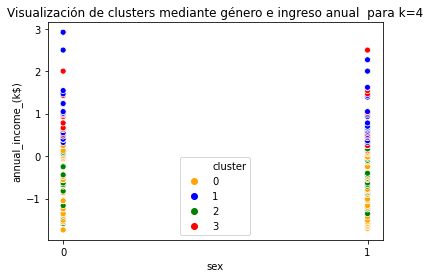

In [174]:
sns.scatterplot(x='sex', y='annual_income_(k$)', hue="cluster",data=df,palette=["orange", "blue","green", "red"])
plt.title("Visualización de clusters mediante género e ingreso anual  para k=4")

Podemos ver que parece haber un número parecido de hombres que de mujeres en los clusters. Además confirmamos algo que ya sabíamos: aquellas personas que pertenecen al cluster 1 y 3 tienen un ingreso muy alto pero los amarillos y verdes no lo tienen.

10. Para la descripción de los grupos utiliza 2 gráficas al menos por grupo que permitan visualizar alguna de las características más importantes.

Creemos que es importante segmentar cada cluster y darnos una idea de los valores que interesan: edad y spending score. También podemos visualizar el anual income aunque creemos que este es ligeramente menos relevante. La razón es que tal vez a un centro comercial no le interesa tanto cuanto gana la gente sino que tan propenso es el cliente a gastar y justo esto es lo que refleja el spending score. Tal vez la variable de ingreso anual interesa si lo que el centro comercial busca es desarrollar cierta imagen o será un centro comercial exclusivo. En ese caso buscará que acuda más gente con un alto ingreso anual aunque sea menos propensa a realizar compras.   

Utilizaremos diagramas de caja para darnos una idea de los valores que tiene cada uno de nuestros clusters. Posteriormente describiremos las personas en cada cluster.

In [168]:
customers["Cluster"]=df["cluster"]
customers.head()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100),quartil,Cluster
0,1,0,19,15,39,1,0
1,2,0,21,15,81,1,0
2,3,1,20,16,6,1,0
3,4,1,23,16,77,1,0
4,5,1,31,17,40,2,0


Text(0.5, 1.0, 'Diagrama de caja para la variable edad agrupados por cluster')

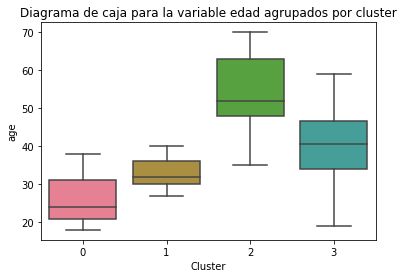

In [169]:
sns.boxplot(x="Cluster",y="age", data=customers)
plt.title('Diagrama de caja para la variable edad agrupados por cluster')

Text(0.5, 1.0, 'Diagrama de caja para la variable `spending score`  por cluster formado de edad')

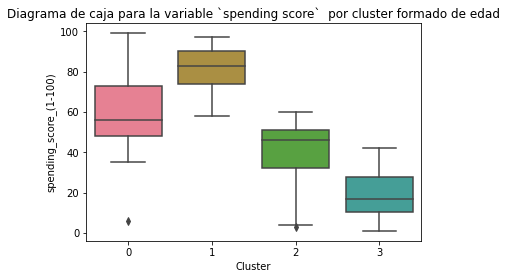

In [171]:
sns.boxplot(x="Cluster",y="spending_score_(1-100)", data=customers)
plt.title('Diagrama de caja para la variable `spending score`  por cluster formado de edad')

Text(0.5, 1.0, 'Diagrama de caja para la variable `annual_income_(k$)` por Cluster formado')

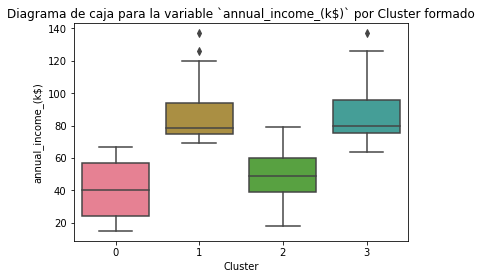

In [172]:
sns.boxplot(x="Cluster",y="annual_income_(k$)", data=customers)
plt.title('Diagrama de caja para la variable `annual_income_(k$)` por Cluster formado')

A partir de las gráficas anteriores podemos dar una descripción de cada cluster que hizo nuestro algoritmo.    

* Cluster 0: Son gente joven. Tenemos desde adolescentes hasta adultos jóvenes. La mayoría de observaciones tienen entre 20 y 30 años de edad. Sin embargo, tienen bajo ingreso con respecto a los otros datos en el dataset. No obstante como comentábamos en la sección anterior, aunque tienen ingresos bajos, las observaciones de este cluster son altamente propensas a gastar ya que gran parte de las personas tienen un spending score muy alto.      


* Cluster 1: Gran parte de las observaciones en este cluster son adultos ya no tan jóvenes. Todas las observaciones caen en un rango aproximado de entre 27 y 42 años. Podríamos considerar a estas personas como el mejor tipo de cliente ya que vemos que todas tienen un ingreso anual bastante alto y además la mitad de nuestros datos registran un spending score alto.       


* Cluster 2: El cluster dos son principalmente "Boomers". Todas las personas de este cluster caen en un rango entre 35 y 70 años pero la mayoría está aproximadamente entre los 62 y 47 años. No cuentan con un ingreso tan alto. Sus ingresos están enre 20 y 80 mil pesos anuales. Tampoco son tan propesnsos a gastar ya que todos los datos presentan un spending score por debajo de 60. Podríamos decir que este tipo de cliente no es tan atractivo para el centro comercial ya que tienen un ingreso bajo y no son tan propensos a gastar.     


* Cluster 3: Las personas en este cluster abarcan un rango de edad muy amplio por lo que tal vez no es buena métrica para hablar sobre este grupo. Las personas en este Cluster pueden estar entre los 20 y los 60 años. Sin embargo, podemos delimitar un poco diciendo que el 75% de los datos está por debajo de los 45 años. Ya que el rango de edad es amplio, veamos entonces lo que si tienen en común. Las personas de este grupo se caracterizan por tener un ingreso alto pero no ser muy propensas a gastar. Esto lo podemos intuir ya que tienen ingresos muy parecidos a los del grupo 2 pero con la gran diferencia de que su spending score es malo. De hecho, registran el peor spending score del dataset. Todos los datos en este grupo tienen un spending score menor a 42. Este tipo de cliente puede resultar  medianamente atractivo para los centros comerciales debido a su alto poder adquisitivo pero no tan deseable por ser menos propensos a gastar. 